In [1]:
%run auxiliary.ipynb

Using TensorFlow backend.


## Preprocessing

In [2]:
print("Setting general dataframe...")
all_releases_df = pd.read_csv('all_releases.csv')
print("Total of instances:", all_releases_df.shape[0])
print("... DONE!")

print("Filtering required columns into X features...")
X = all_releases_df.drop(columns=['File', 'Kind', 'Name','Path', 'class_frequency', 'number_of_changes', 'release', 'will_change'])
print("... DONE!")

print("Setting y column containing label of change-proneness...")
y = pd.DataFrame(all_releases_df.loc[:,'will_change'])
print("... DONE!")

print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=10
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Setting general dataframe...
Total of instances: 100640
... DONE!
Filtering required columns into X features...
... DONE!
Setting y column containing label of change-proneness...
... DONE!
Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 70448 X Test set: 30192
y Train set: 70448 y Test set: 30192
... DONE!
Scaling features...
... DONE!
Setting stratified k-fold...
k = 10
... DONE!



## Statistical Analysis

In [3]:
all_releases_df.describe()

,CountClassCoupled,CountClassDerived,CountDeclMethod,CountDeclMethodAll,CountLineCode,MaxInheritanceTree,PercentLackOfCohesion,SumCyclomatic,class_frequency,number_of_changes,release,will_change
count,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000
mean,5.338504,0.448698,4.287997,8.674672,57.746343,1.625735,17.538782,5.891107,6.378975,7.580535,8.864159,0.167548
std,7.230259,11.276201,5.618115,8.966859,117.082274,0.759659,28.567063,9.420142,4.120797,4.492134,4.233281,0.373466
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,8.000000,1.000000,0.000000,1.000000,3.000000,4.000000,5.000000,0.000000
50%,3.000000,0.000000,2.000000,6.000000,22.000000,1.000000,0.000000,3.000000,6.000000,8.000000,9.000000,0.000000
75%,7.000000,0.000000,5.000000,11.000000,57.000000,2.000000,33.000000,7.000000,9.000000,12.000000,13.000000,0.000000
max,106.000000,901.000000,100.000000,100.000000,2749.000000,6.000000,100.000000,179.000000,15.000000,15.000000,15.000000,1.000000


will_change
0    58599
1    11849
Name: will_change, dtype: int64

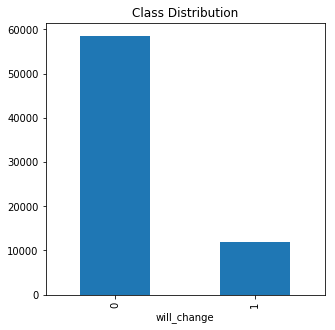

In [4]:
ax = y_train.groupby(['will_change'])['will_change'].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby(['will_change'])['will_change'].count()

In [5]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7
0,1.0,-0.0079,0.46,0.28,0.63,-0.051,0.37,0.51
1,-0.0079,1.0,0.087,0.049,0.032,-0.011,0.019,0.03
2,0.46,0.087,1.0,0.5,0.8,-0.17,0.55,0.88
3,0.28,0.049,0.5,1.0,0.3,0.5,0.3,0.43
4,0.63,0.032,0.8,0.3,1.0,-0.25,0.53,0.86
5,-0.051,-0.011,-0.17,0.5,-0.25,1.0,-0.11,-0.12
6,0.37,0.019,0.55,0.3,0.53,-0.11,1.0,0.57
7,0.51,0.03,0.88,0.43,0.86,-0.12,0.57,1.0


## Imbalanced baseline

In [6]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5764375513025446
2 of KFold 10
ROC AUC score: 0.593892657075791
3 of KFold 10
ROC AUC score: 0.577778257801587
4 of KFold 10
ROC AUC score: 0.5800830921213692
5 of KFold 10
ROC AUC score: 0.5800352097464034
6 of KFold 10
ROC AUC score: 0.5809410146743278
7 of KFold 10
ROC AUC score: 0.5774754827839461
8 of KFold 10
ROC AUC score: 0.5817942569951469
9 of KFold 10
ROC AUC score: 0.5824628101553837
10 of KFold 10
ROC AUC score: 0.5803788379393218

CROSS VALIDANTION SUMMARY:
Mean: 0.5811279170595822
Std deviation: 0.004632561719388786

TEST SET:
F1-Score(micro): 0.6890898251192369
F1-Score(macro): 0.555838911271461
F1-Score(weighted): 0.718331378384858
F1-Score(None): [0.79911832 0.3125595 ]
Accuracy: 0.6890898251192369
Sensitivity: 0.4256931976860164
Specificity: 0.7415306406132094
Confusion Matrix: [0.7415306406132094, 0.43]
ROC AUC score: 0.5836119191496127
CPU times: user 10.5 s, sys: 5.95 s, total: 16.5 s
W

In [7]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 2.62 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6232614737690989
2 of KFold 10
ROC AUC score: 0.6281775176048732
3 of KFold 10
ROC AUC score: 0.6340378882792587
4 of KFold 10
ROC AUC score: 0.6347204821359139
5 of KFold 10
ROC AUC score: 0.6564475597989661
6 of KFold 10
ROC AUC score: 0.6350711395285207
7 of KFold 10
ROC AUC score: 0.6304157486211317
8 of KFold 10
ROC AUC score: 0.6319573450843161
9 of KFold 10
ROC AUC score: 0.6397078095073515
10 of KFold 10
ROC AUC score: 0.6351665605697864

CROSS VALIDANTION SUMMARY:
Mean: 0.6348963524899217
Std deviation: 0.00835286076638236

TEST SET:
F1-Score(micro): 0.7218137254901961
F1-Score(macro): 0.6003012037866713
F1-Score(weighted): 0.7475001893500328
F1-Score(None): [0.82068362 0.37991879]
Accuracy: 0.7218137254901961
Sensitivity: 0.5132655096748454
Specificity: 0.7633345248024147
Confusion Matrix: [0.7633345248024147, 0.51]
ROC AUC score: 0.6383000

In [8]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.62 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6128522774729626
2 of KFold 10
ROC AUC score: 0.6100308175285495
3 of KFold 10
ROC AUC score: 0.6254673031782376
4 of KFold 10
ROC AUC score: 0.6152273152748376
5 of KFold 10
ROC AUC score: 0.6229450180728965
6 of KFold 10
ROC AUC score: 0.6176689563802364
7 of KFold 10
ROC AUC score: 0.6155264901139096
8 of KFold 10
ROC AUC score: 0.6184753963796604
9 of KFold 10
ROC AUC score: 0.6135348713296178
10 of KFold 10
ROC AUC score: 0.6233913925446184

CROSS VALIDANTION SUMMARY:
Mean: 0.6175119838275528
Std deviation: 0.004806092488507515

TEST SET:
F1-Score(micro): 0.7508280339162692
F1-Score(macro): 0.607641930785454
F1-Score(weighted): 0.765956035491634
F1-Score(None): [0.84466561 0.37061825]
Accuracy: 0.7508280339162692
Sensitivity: 0.44185118691402353
Specificity: 0.8123436196830692
Confusion Matrix: [0.8123436196830692, 0.44]
ROC AUC score: 0.62709

In [9]:
%%time
NN_(X_train, y_train, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.62 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5031101942656355
2 of KFold 10
ROC AUC score: 0.504044080586397
3 of KFold 10
ROC AUC score: 0.5044660215146671
4 of KFold 10
ROC AUC score: 0.5008345213922611
5 of KFold 10
ROC AUC score: 0.5031101942656355
6 of KFold 10
ROC AUC score: 0.5010951743206463
7 of KFold 10
ROC AUC score: 0.5015977592488587
8 of KFold 10
ROC AUC score: 0.5042100488184215
9 of KFold 10
ROC AUC score: 0.5131514523120347
10 of KFold 10
ROC AUC score: 0.5036212047300757

CROSS VALIDANTION SUMMARY:
Mean: 0.5039240651454633
Std deviation: 0.003315277968296511

TEST SET:
F1-Score(micro): 0.8343600953895072
F1-Score(macro): 0.4672242427163632
F1-Score(weighted): 0.7626262937480282
F1-Score(None): [0.90949235 0.02495613]
Accuracy: 0.8343600953895072
Sensitivity: 0.012766806303610613
Specificity: 0.9979347869256127
Confusion Matrix: [0.9979347869256127, 0.01]
ROC AUC score: 0.505350

## Undersampling

In [10]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 23698 23698


In [11]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5838168175137309
2 of KFold 10
ROC AUC score: 0.5861561089374011
3 of KFold 10
ROC AUC score: 0.5887729678396892
4 of KFold 10
ROC AUC score: 0.5845852537264421
5 of KFold 10
ROC AUC score: 0.5787942002933812
6 of KFold 10
ROC AUC score: 0.5738069422025901
7 of KFold 10
ROC AUC score: 0.5829597571057397
8 of KFold 10
ROC AUC score: 0.5771830642054145
9 of KFold 10
ROC AUC score: 0.6043123543123543
10 of KFold 10
ROC AUC score: 0.5731205887272119

CROSS VALIDANTION SUMMARY:
Mean: 0.5833508054863955
Std deviation: 0.008562104848912526

TEST SET:
F1-Score(micro): 0.6874337572866984
F1-Score(macro): 0.5547632642074687
F1-Score(weighted): 0.7170976591735355
F1-Score(None): [0.79780601 0.31172052]
Accuracy: 0.6874337572866984
Sensitivity: 0.4262916417314981
Specificity: 0.7394257119027762
Confusion Matrix: [0.7394257119027762, 0.43]
ROC AUC score: 0.5828586768171371
CPU times: user 5.1 s, sys: 3.3 s, total: 8.4 s


In [12]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.34 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5631126435257324
2 of KFold 10
ROC AUC score: 0.576931046671786
3 of KFold 10
ROC AUC score: 0.5892131180776372
4 of KFold 10
ROC AUC score: 0.580619373199326
5 of KFold 10
ROC AUC score: 0.5962649419556967
6 of KFold 10
ROC AUC score: 0.5789575711208095
7 of KFold 10
ROC AUC score: 0.5858593811510904
8 of KFold 10
ROC AUC score: 0.5933421834647502
9 of KFold 10
ROC AUC score: 0.5960761460761461
10 of KFold 10
ROC AUC score: 0.6071189162067236

CROSS VALIDANTION SUMMARY:
Mean: 0.5867495321449698
Std deviation: 0.01181593796569917

TEST SET:
F1-Score(micro): 0.706379173290938
F1-Score(macro): 0.5636144173391312
F1-Score(weighted): 0.7303289965576231
F1-Score(None): [0.81321506 0.31401377]
Accuracy: 0.706379173290938
Sensitivity: 0.4047476560941552
Specificity: 0.7664323444139958
Confusion Matrix: [0.7664323444139958, 0.4]
ROC AUC score: 0.5855900002540

In [13]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 0 ns, sys: 1e+03 ns, total: 1e+03 ns
Wall time: 2.86 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5433809634320194
2 of KFold 10
ROC AUC score: 0.5661986080130667
3 of KFold 10
ROC AUC score: 0.5681939435327258
4 of KFold 10
ROC AUC score: 0.5628833456473045
5 of KFold 10
ROC AUC score: 0.5649549778432007
6 of KFold 10
ROC AUC score: 0.5511017861458356
7 of KFold 10
ROC AUC score: 0.5713034406739625
8 of KFold 10
ROC AUC score: 0.5722582712488985
9 of KFold 10
ROC AUC score: 0.5778943278943279
10 of KFold 10
ROC AUC score: 0.5827576517812343

CROSS VALIDANTION SUMMARY:
Mean: 0.5660927316212576
Std deviation: 0.011129853593323651

TEST SET:
F1-Score(micro): 0.7547363540010599
F1-Score(macro): 0.5687663579301515
F1-Score(weighted): 0.7579160498031497
F1-Score(None): [0.85195626 0.28557646]
Accuracy: 0.7547363540010599
Sensitivity: 0.2952323957709954
Specificity: 0.8462210572302316
Confusion Matrix: [0.8462210572302316, 0.3]
ROC AUC score: 0.5

In [14]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.62 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.49974398361495137
2 of KFold 10
ROC AUC score: 0.5
3 of KFold 10
ROC AUC score: 0.5
4 of KFold 10
ROC AUC score: 0.49974785678265254
5 of KFold 10
ROC AUC score: 0.49923973644196656
6 of KFold 10
ROC AUC score: 0.4994946942900455
7 of KFold 10
ROC AUC score: 0.5004342669868516
8 of KFold 10
ROC AUC score: 0.4992389649923896
9 of KFold 10
ROC AUC score: 0.5012820512820513
10 of KFold 10
ROC AUC score: 0.4997491219267436

CROSS VALIDANTION SUMMARY:
Mean: 0.4998930676317652
Std deviation: 0.0005764084673231982

TEST SET:
F1-Score(micro): 0.8341944886062533
F1-Score(macro): 0.4589273035244478
F1-Score(weighted): 0.7598992274172132
F1-Score(None): [0.90953448 0.00832013]
Accuracy: 0.8341944886062533
Sensitivity: 0.004189108318372232
Specificity: 0.9994439810953573
Confusion Matrix: [0.9994439810953573, 0.0]
ROC AUC score: 0.5018165447068648
CPU tim

In [15]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

Resampling dataset using Edited Nearest Neighbour (ENN)...
... DONE!
X and Y ENN: 54341 54341


In [16]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5841352872304264
2 of KFold 10
ROC AUC score: 0.5845648834376648
3 of KFold 10
ROC AUC score: 0.5940252356731341
4 of KFold 10
ROC AUC score: 0.5807716118900011
5 of KFold 10
ROC AUC score: 0.5655779205329527
6 of KFold 10
ROC AUC score: 0.5700997772959034
7 of KFold 10
ROC AUC score: 0.5761185384791027
8 of KFold 10
ROC AUC score: 0.5779226892866111
9 of KFold 10
ROC AUC score: 0.5841244588027378
10 of KFold 10
ROC AUC score: 0.5866083493215004

CROSS VALIDANTION SUMMARY:
Mean: 0.5803948751950034
Std deviation: 0.007872453924477472

TEST SET:
F1-Score(micro): 0.6871025437201908
F1-Score(macro): 0.5548413711323119
F1-Score(weighted): 0.7169109346254859
F1-Score(None): [0.79748762 0.31219512]
Accuracy: 0.6871025437201908
Sensitivity: 0.4276880111709555
Specificity: 0.7387505460899957
Confusion Matrix: [0.7387505460899957, 0.43]
ROC AUC score: 0.5832192786304756
CPU times: user 9.36 s, sys: 5.23 s, total: 14.6

In [17]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6165495839155997
2 of KFold 10
ROC AUC score: 0.6144877004062158
3 of KFold 10
ROC AUC score: 0.6200879187619072
4 of KFold 10
ROC AUC score: 0.6224346169325805
5 of KFold 10
ROC AUC score: 0.6266973590292647
6 of KFold 10
ROC AUC score: 0.613853562288773
7 of KFold 10
ROC AUC score: 0.6363651067895187
8 of KFold 10
ROC AUC score: 0.6318316137234038
9 of KFold 10
ROC AUC score: 0.6199224521021836
10 of KFold 10
ROC AUC score: 0.6254402001301265

CROSS VALIDANTION SUMMARY:
Mean: 0.6227670114079574
Std deviation: 0.007012141578261986

TEST SET:
F1-Score(micro): 0.72025702172761
F1-Score(macro): 0.5950986532483071
F1-Score(weighted): 0.7454586948754739
F1-Score(None): [0.82021372 0.36998359]
Accuracy: 0.72025702172761
Sensitivity: 0.4947137442649112
Specificity: 0.7651614440605267
Confusion Matrix: [0.7651614440605267, 0.49]
ROC AUC score: 0.629937594

In [18]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.38 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5970490110913875
2 of KFold 10
ROC AUC score: 0.5973823468812682
3 of KFold 10
ROC AUC score: 0.6023988470302715
4 of KFold 10
ROC AUC score: 0.6049506388457083
5 of KFold 10
ROC AUC score: 0.6045274803711634
6 of KFold 10
ROC AUC score: 0.5983155560765008
7 of KFold 10
ROC AUC score: 0.6212936064186816
8 of KFold 10
ROC AUC score: 0.6053943545783868
9 of KFold 10
ROC AUC score: 0.6017027004306161
10 of KFold 10
ROC AUC score: 0.5981742076397658

CROSS VALIDANTION SUMMARY:
Mean: 0.603118874936375
Std deviation: 0.00678700816803273

TEST SET:
F1-Score(micro): 0.7456942236353999
F1-Score(macro): 0.594706143907096
F1-Score(weighted): 0.7599343626937783
F1-Score(None): [0.84208145 0.34733084]
Accuracy: 0.7456942236354
Sensitivity: 0.40754039497307004
Specificity: 0.8130187854958497
Confusion Matrix: [0.8130187854958497, 0.41]
ROC AUC score: 0.6102795902344

In [19]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5030101597613023
2 of KFold 10
ROC AUC score: 0.5009639041564911
3 of KFold 10
ROC AUC score: 0.502065536592449
4 of KFold 10
ROC AUC score: 0.503469988836662
5 of KFold 10
ROC AUC score: 0.5030806566738044
6 of KFold 10
ROC AUC score: 0.5009994823106526
7 of KFold 10
ROC AUC score: 0.5035737788762397
8 of KFold 10
ROC AUC score: 0.5018458906702693
9 of KFold 10
ROC AUC score: 0.5030031193850308
10 of KFold 10
ROC AUC score: 0.5021413276231264

CROSS VALIDANTION SUMMARY:
Mean: 0.5024153844886028
Std deviation: 0.0009071517491170023

TEST SET:
F1-Score(micro): 0.8344263381028088
F1-Score(macro): 0.46094514768637757
F1-Score(weighted): 0.7606396161093512
F1-Score(None): [0.90963975 0.01225054]
Accuracy: 0.8344263381028086
Sensitivity: 0.006183921803311391
Specificity: 0.9993248341872195
Confusion Matrix: [0.9993248341872195, 0.01]
ROC AUC score:

In [20]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y IHT:", len(X_TL), len(y_TL))

Resampling dataset using Tomek's Link (TL)...
... DONE!
X and Y IHT: 70246 70246


In [21]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.574886894137658
2 of KFold 10
ROC AUC score: 0.5941345574841447
3 of KFold 10
ROC AUC score: 0.5818032212048039
4 of KFold 10
ROC AUC score: 0.5736543334512327
5 of KFold 10
ROC AUC score: 0.5823727841961372
6 of KFold 10
ROC AUC score: 0.5816805862745109
7 of KFold 10
ROC AUC score: 0.5766392290088662
8 of KFold 10
ROC AUC score: 0.5829774572874361
9 of KFold 10
ROC AUC score: 0.5833123947253319
10 of KFold 10
ROC AUC score: 0.580223413706819

CROSS VALIDANTION SUMMARY:
Mean: 0.581168487147694
Std deviation: 0.005435360305187774

TEST SET:
F1-Score(micro): 0.6891229464758877
F1-Score(macro): 0.5557710813173645
F1-Score(weighted): 0.7183375009030722
F1-Score(None): [0.79916121 0.31238095]
Accuracy: 0.6891229464758877
Sensitivity: 0.4252942349890285
Specificity: 0.7416497875213471
Confusion Matrix: [0.7416497875213471, 0.43]
ROC AUC score: 0.5834720112551879
CPU times: user 12.4 s, sys: 6.67 s, total: 19.1 s


In [22]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 3.1 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.625713736468968
2 of KFold 10
ROC AUC score: 0.630371670199097
3 of KFold 10
ROC AUC score: 0.6299143040437539
4 of KFold 10
ROC AUC score: 0.6324891979944084
5 of KFold 10
ROC AUC score: 0.6570637475379957
6 of KFold 10
ROC AUC score: 0.6360906741012194
7 of KFold 10
ROC AUC score: 0.6356162167669301
8 of KFold 10
ROC AUC score: 0.6295793316317025
9 of KFold 10
ROC AUC score: 0.6422981983491072
10 of KFold 10
ROC AUC score: 0.6328848432080817

CROSS VALIDANTION SUMMARY:
Mean: 0.6352021920301264
Std deviation: 0.008455265947855173

TEST SET:
F1-Score(micro): 0.7227742448330683
F1-Score(macro): 0.6012834987711954
F1-Score(weighted): 0.7482883220691512
F1-Score(None): [0.82137522 0.38119178]
Accuracy: 0.7227742448330684
Sensitivity: 0.514262916417315
Specificity: 0.7642877000675166
Confusion Matrix: [0.7642877000675166, 0.51]
ROC AUC score: 0.6392753082

In [23]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6082234668885895
2 of KFold 10
ROC AUC score: 0.6130854372882063
3 of KFold 10
ROC AUC score: 0.6206972000314219
4 of KFold 10
ROC AUC score: 0.610377449595084
5 of KFold 10
ROC AUC score: 0.6255298821177647
6 of KFold 10
ROC AUC score: 0.6195009936156548
7 of KFold 10
ROC AUC score: 0.6176944294335536
8 of KFold 10
ROC AUC score: 0.6146147562991158
9 of KFold 10
ROC AUC score: 0.6202108750476935
10 of KFold 10
ROC AUC score: 0.6186194970052853

CROSS VALIDANTION SUMMARY:
Mean: 0.6168553987322369
Std deviation: 0.004977827520446977

TEST SET:
F1-Score(micro): 0.7504968203497615
F1-Score(macro): 0.6066243581211723
F1-Score(weighted): 0.7655230970062006
F1-Score(None): [0.84452333 0.36872538]
Accuracy: 0.7504968203497615
Sensitivity: 0.4388589666866148
Specificity: 0.8125421978632987
Confusion Matrix: [0.8125421978632987, 0.44]
ROC AUC score: 0.62

In [24]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.38 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5027783709105775
2 of KFold 10
ROC AUC score: 0.503130286691924
3 of KFold 10
ROC AUC score: 0.5059031418530068
4 of KFold 10
ROC AUC score: 0.5022900014870716
5 of KFold 10
ROC AUC score: 0.5049309903871594
6 of KFold 10
ROC AUC score: 0.5027383590675477
7 of KFold 10
ROC AUC score: 0.5028258871039334
8 of KFold 10
ROC AUC score: 0.5039242356298266
9 of KFold 10
ROC AUC score: 0.5031448625962013
10 of KFold 10
ROC AUC score: 0.5040480632748291

CROSS VALIDANTION SUMMARY:
Mean: 0.5035714199002077
Std deviation: 0.0010739807266219694

TEST SET:
F1-Score(micro): 0.8341282458929519
F1-Score(macro): 0.4644886176086934
F1-Score(weighted): 0.761656244142753
F1-Score(None): [0.9094001  0.01957713]
Accuracy: 0.8341282458929518
Sensitivity: 0.00997406742469579
Specificity: 0.998212796377934
Confusion Matrix: [0.998212796377934, 0.01]
ROC AUC score: 0.50409

## Oversampling

In [25]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

Resampling dataset using Random OverSampling (ROS)...
X and Y ROS: 117198 117198


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.34 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5770477815699658
2 of KFold 10
ROC AUC score: 0.585580204778157
3 of KFold 10
ROC AUC score: 0.5859215017064847
4 of KFold 10
ROC AUC score: 0.580716723549488
5 of KFold 10
ROC AUC score: 0.5820819112627986
6 of KFold 10
ROC AUC score: 0.5752559726962457
7 of KFold 10
ROC AUC score: 0.5775597269624573
8 of KFold 10
ROC AUC score: 0.5813993174061434
9 of KFold 10
ROC AUC score: 0.5805460750853242
10 of KFold 10
ROC AUC score: 0.5705751834784093

CROSS VALIDANTION SUMMARY:
Mean: 0.5796684398495474
Std deviation: 0.004452093535941247

TEST SET:
F1-Score(micro): 0.6884605193428723
F1-Score(macro): 0.5554235091103741
F1-Score(weighted): 0.7178614086228808
F1-Score(None): [0.79862122 0.3122258 ]
Accuracy: 0.6884605193428723
Sensitivity: 0.4258926790345103
Specificity: 0.7407363278922912
Confusion Matrix: [0.7407363278922912, 0.43]
ROC AUC score: 0.583

In [27]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.34 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7892491467576792
2 of KFold 10
ROC AUC score: 0.7843856655290102
3 of KFold 10
ROC AUC score: 0.7917235494880547
4 of KFold 10
ROC AUC score: 0.7901023890784983
5 of KFold 10
ROC AUC score: 0.7996587030716724
6 of KFold 10
ROC AUC score: 0.7918941979522185
7 of KFold 10
ROC AUC score: 0.7918941979522184
8 of KFold 10
ROC AUC score: 0.7957337883959046
9 of KFold 10
ROC AUC score: 0.7901877133105802
10 of KFold 10
ROC AUC score: 0.7876770779996587

CROSS VALIDANTION SUMMARY:
Mean: 0.7912506429535495
Std deviation: 0.003977418881623434

TEST SET:
F1-Score(micro): 0.7275437201907791
F1-Score(macro): 0.6075233625624741
F1-Score(weighted): 0.7524880566168823
F1-Score(None): [0.82456066 0.39048607]
Accuracy: 0.7275437201907791
Sensitivity: 0.5256333532814682
Specificity: 0.7677429604035109
Confusion Matrix: [0.7677429604035109, 0.53]
ROC AUC score: 0.6466881

In [28]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7915529010238908
2 of KFold 10
ROC AUC score: 0.7868600682593857
3 of KFold 10
ROC AUC score: 0.7934300341296929
4 of KFold 10
ROC AUC score: 0.7924914675767919
5 of KFold 10
ROC AUC score: 0.8011092150170649
6 of KFold 10
ROC AUC score: 0.7918941979522184
7 of KFold 10
ROC AUC score: 0.7940273037542662
8 of KFold 10
ROC AUC score: 0.7962457337883959
9 of KFold 10
ROC AUC score: 0.7939419795221844
10 of KFold 10
ROC AUC score: 0.7889571599249019

CROSS VALIDANTION SUMMARY:
Mean: 0.7930510060948792
Std deviation: 0.003688015239537829

TEST SET:
F1-Score(micro): 0.7229398516163222
F1-Score(macro): 0.6061101996341568
F1-Score(weighted): 0.7493922504686972
F1-Score(None): [0.82062828 0.39159212]
Accuracy: 0.7229398516163222
Sensitivity: 0.5370037901456214
Specificity: 0.7599586957385123
Confusion Matrix: [0.7599586957385123, 0.54]
ROC AUC score: 0.64848124

In [29]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.62 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5929180887372014
2 of KFold 10
ROC AUC score: 0.6031569965870308
3 of KFold 10
ROC AUC score: 0.5965017064846416
4 of KFold 10
ROC AUC score: 0.5997440273037542
5 of KFold 10
ROC AUC score: 0.5949658703071673
6 of KFold 10
ROC AUC score: 0.5935153583617747
7 of KFold 10
ROC AUC score: 0.5924061433447099
8 of KFold 10
ROC AUC score: 0.5964163822525597
9 of KFold 10
ROC AUC score: 0.5978668941979521
10 of KFold 10
ROC AUC score: 0.594384707287933

CROSS VALIDANTION SUMMARY:
Mean: 0.5961876174864724
Std deviation: 0.003179068046413073

TEST SET:
F1-Score(micro): 0.6396065182829889
F1-Score(macro): 0.5408363158655405
F1-Score(weighted): 0.6830772572316952
F1-Score(None): [0.75379568 0.32787695]
Accuracy: 0.6396065182829889
Sensitivity: 0.5294234989028526
Specificity: 0.6615433496167441
Confusion Matrix: [0.6615433496167441, 0.53]
ROC AUC score: 0.59548342

In [30]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

Resampling dataset using SMOTE (SMO)...


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X and Y SMO: 117198 117198


In [31]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 0 ns, sys: 1 µs, total: 1 µs
Wall time: 3.1 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5784982935153584
2 of KFold 10
ROC AUC score: 0.5840443686006827
3 of KFold 10
ROC AUC score: 0.5842150170648464
4 of KFold 10
ROC AUC score: 0.5770477815699658
5 of KFold 10
ROC AUC score: 0.5836177474402731
6 of KFold 10
ROC AUC score: 0.5758532423208191
7 of KFold 10
ROC AUC score: 0.577047781569966
8 of KFold 10
ROC AUC score: 0.5821672354948805
9 of KFold 10
ROC AUC score: 0.5787542662116041
10 of KFold 10
ROC AUC score: 0.5756955111793822

CROSS VALIDANTION SUMMARY:
Mean: 0.5796941244967778
Std deviation: 0.003285347467830342

TEST SET:
F1-Score(micro): 0.6892885532591415
F1-Score(macro): 0.5559846973600762
F1-Score(weighted): 0.7184827665168526
F1-Score(None): [0.79927249 0.3126969 ]
Accuracy: 0.6892885532591415
Sensitivity: 0.4256931976860164
Specificity: 0.7417689344294849
Confusion Matrix: [0.7417689344294849, 0.43]
ROC AUC score: 0.583

In [32]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 7 µs, sys: 5 µs, total: 12 µs
Wall time: 3.58 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6745733788395905
2 of KFold 10
ROC AUC score: 0.6762798634812287
3 of KFold 10
ROC AUC score: 0.8453924914675768
4 of KFold 10
ROC AUC score: 0.8462457337883957
5 of KFold 10
ROC AUC score: 0.8517064846416381
6 of KFold 10
ROC AUC score: 0.8430887372013652
7 of KFold 10
ROC AUC score: 0.8465017064846417
8 of KFold 10
ROC AUC score: 0.8455631399317406
9 of KFold 10
ROC AUC score: 0.8418088737201365
10 of KFold 10
ROC AUC score: 0.8505717699266087

CROSS VALIDANTION SUMMARY:
Mean: 0.8121732179482922
Std deviation: 0.06843235885772084

TEST SET:
F1-Score(micro): 0.5566706412294647
F1-Score(macro): 0.4899334557275348
F1-Score(weighted): 0.6131659511795923
F1-Score(None): [0.67443388 0.30543303]
Accuracy: 0.5566706412294647
Sensitivity: 0.5870736086175943
Specificity: 0.5506175781405139
Confusion Matrix: [0.5506175781405139, 0.59]
ROC AUC score: 0.5688455

In [33]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.62 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6907849829351534
2 of KFold 10
ROC AUC score: 0.6895904436860069
3 of KFold 10
ROC AUC score: 0.851962457337884
4 of KFold 10
ROC AUC score: 0.8537542662116041
5 of KFold 10
ROC AUC score: 0.8570819112627985
6 of KFold 10
ROC AUC score: 0.8507679180887374
7 of KFold 10
ROC AUC score: 0.8556313993174061
8 of KFold 10
ROC AUC score: 0.8499146757679181
9 of KFold 10
ROC AUC score: 0.8505119453924914
10 of KFold 10
ROC AUC score: 0.8521078682369005

CROSS VALIDANTION SUMMARY:
Mean: 0.8202107868236901
Std deviation: 0.06504751282960525

TEST SET:
F1-Score(micro): 0.6679252782193958
F1-Score(macro): 0.5729206434571992
F1-Score(weighted): 0.707461617095855
F1-Score(None): [0.77435182 0.37148947]
Accuracy: 0.6679252782193958
Sensitivity: 0.5910632355874725
Specificity: 0.6832280868978117
Confusion Matrix: [0.6832280868978117, 0.59]
ROC AUC score: 0.63714566124

In [34]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.38 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5943686006825939
2 of KFold 10
ROC AUC score: 0.6001706484641638
3 of KFold 10
ROC AUC score: 0.593259385665529
4 of KFold 10
ROC AUC score: 0.5993174061433447
5 of KFold 10
ROC AUC score: 0.5984641638225255
6 of KFold 10
ROC AUC score: 0.5976109215017065
7 of KFold 10
ROC AUC score: 0.5918941979522184
8 of KFold 10
ROC AUC score: 0.5964163822525597
9 of KFold 10
ROC AUC score: 0.5985494880546075
10 of KFold 10
ROC AUC score: 0.5957501280081925

CROSS VALIDANTION SUMMARY:
Mean: 0.5965801322547442
Std deviation: 0.0025974385436872732

TEST SET:
F1-Score(micro): 0.6060545839957605
F1-Score(macro): 0.5266474679677252
F1-Score(weighted): 0.6561415567451276
F1-Score(None): [0.72052258 0.33277235]
Accuracy: 0.6060545839957605
Sensitivity: 0.5916616796329544
Specificity: 0.6089201318559117
Confusion Matrix: [0.6089201318559117, 0.59]
ROC AUC score: 0

In [35]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

Resampling dataset using ADASYN (ADA)...


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X and Y ADA: 116949 116949


In [36]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 0 ns, sys: 2 µs, total: 2 µs
Wall time: 2.62 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5776403718878955
2 of KFold 10
ROC AUC score: 0.5772778718513383
3 of KFold 10
ROC AUC score: 0.5610495977258569
4 of KFold 10
ROC AUC score: 0.558338231982476
5 of KFold 10
ROC AUC score: 0.5624210001433038
6 of KFold 10
ROC AUC score: 0.5532012306576473
7 of KFold 10
ROC AUC score: 0.5487314692145492
8 of KFold 10
ROC AUC score: 0.545040958555966
9 of KFold 10
ROC AUC score: 0.5568785807662949
10 of KFold 10
ROC AUC score: 0.5445127154804574

CROSS VALIDANTION SUMMARY:
Mean: 0.5585092028265785
Std deviation: 0.011152499250549518

TEST SET:
F1-Score(micro): 0.6527888182299947
F1-Score(macro): 0.5375618874735968
F1-Score(weighted): 0.6917431817230506
F1-Score(None): [0.76839803 0.30672575]
Accuracy: 0.6527888182299947
Sensitivity: 0.46259724715739076
Specificity: 0.690654910838397
Confusion Matrix: [0.690654910838397, 0.46]
ROC AUC score: 0.5766

In [37]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6690756322181961
2 of KFold 10
ROC AUC score: 0.6760989059196154
3 of KFold 10
ROC AUC score: 0.8162558381661797
4 of KFold 10
ROC AUC score: 0.8132545016392195
5 of KFold 10
ROC AUC score: 0.8206084707148519
6 of KFold 10
ROC AUC score: 0.8141241946474581
7 of KFold 10
ROC AUC score: 0.8172017161357116
8 of KFold 10
ROC AUC score: 0.8085598410205566
9 of KFold 10
ROC AUC score: 0.8107024516642247
10 of KFold 10
ROC AUC score: 0.8081979210679766

CROSS VALIDANTION SUMMARY:
Mean: 0.785407947319399
Std deviation: 0.05654948762336663

TEST SET:
F1-Score(micro): 0.5433227344992051
F1-Score(macro): 0.4897378254471303
F1-Score(weighted): 0.6001827637079787
F1-Score(None): [0.65509306 0.3243826 ]
Accuracy: 0.5433227344992051
Sensitivity: 0.6602832635148613
Specificity: 0.5200365383851623
Confusion Matrix: [0.5200365383851623, 0.66]
ROC AUC score: 0.590159900

In [38]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 0 ns, sys: 1e+03 ns, total: 1e+03 ns
Wall time: 2.38 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6755672197022207
2 of KFold 10
ROC AUC score: 0.6802717507333351
3 of KFold 10
ROC AUC score: 0.8217129333111067
4 of KFold 10
ROC AUC score: 0.8227324372461111
5 of KFold 10
ROC AUC score: 0.8247783909619193
6 of KFold 10
ROC AUC score: 0.8187189082007773
7 of KFold 10
ROC AUC score: 0.8235043766139951
8 of KFold 10
ROC AUC score: 0.8146969710263181
9 of KFold 10
ROC AUC score: 0.8176089620420495
10 of KFold 10
ROC AUC score: 0.817853139173315

CROSS VALIDANTION SUMMARY:
Mean: 0.7917445089011148
Std deviation: 0.056997094058531775

TEST SET:
F1-Score(micro): 0.6312268150503445
F1-Score(macro): 0.5508205392085249
F1-Score(weighted): 0.677755951657729
F1-Score(None): [0.74086487 0.36077621]
Accuracy: 0.6312268150503445
Sensitivity: 0.6267703969678835
Specificity: 0.6321140633067238
Confusion Matrix: [0.6321140633067238, 0.63]
ROC AUC score: 0.62

In [39]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.62 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5953064360938318
2 of KFold 10
ROC AUC score: 0.5988664379655545
3 of KFold 10
ROC AUC score: 0.5735644764587008
4 of KFold 10
ROC AUC score: 0.5873367726237164
5 of KFold 10
ROC AUC score: 0.5714560101306989
6 of KFold 10
ROC AUC score: 0.573901678993715
7 of KFold 10
ROC AUC score: 0.565467886795874
8 of KFold 10
ROC AUC score: 0.5678272078284801
9 of KFold 10
ROC AUC score: 0.5784103371732894
10 of KFold 10
ROC AUC score: 0.5699126560723708

CROSS VALIDANTION SUMMARY:
Mean: 0.5782049900136232
Std deviation: 0.011077378099087114

TEST SET:
F1-Score(micro): 0.6261261261261262
F1-Score(macro): 0.5357699267473703
F1-Score(weighted): 0.6725659565275497
F1-Score(None): [0.74057731 0.33096254]
Accuracy: 0.6261261261261262
Sensitivity: 0.556951924995013
Specificity: 0.6398983279717224
Confusion Matrix: [0.6398983279717224, 0.56]
ROC AUC score: 0.5984251264